# Assignment 1:
    Test if the distribution of ages is the same for 
    
    1) Male and female riders
    
    2) Day and night riders
    
    Use 3 tests: KS, Pearson's, Spearman's

In [2]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

pl.style.use('ggplot')


Populating the interactive namespace from numpy and matplotlib


I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. If you are ambitios you can use data from multiple months, thus addressing systematic errors as well

# Age comparison between genders

In [3]:
june = pd.read_csv(os.getenv('PUI2015')+'/datasets/201506-citibike-tripdata.csv')
june['ageM'] = 2015 - june['birth year'][(june['usertype'] == 'Subscriber') & (june['gender'] == 1)]
june['ageF'] = 2015 - june['birth year'][(june['usertype'] == 'Subscriber') & (june['gender'] == 2)]

july = pd.read_csv(os.getenv('PUI2015')+'/datasets/201507-citibike-tripdata.csv')
july['ageM'] = 2015 - july['birth year'][(july['usertype'] == 'Subscriber') & (july['gender'] == 1)]
july['ageF'] = 2015 - july['birth year'][(july['usertype'] == 'Subscriber') & (july['gender'] == 2)]

august = pd.read_csv(os.getenv('PUI2015')+'/datasets/201508-citibike-tripdata.csv')
august['ageM'] = 2015 - august['birth year'][(august['usertype'] == 'Subscriber') & (august['gender'] == 1)]
august['ageF'] = 2015 - august['birth year'][(august['usertype'] == 'Subscriber') & (august['gender'] == 2)]


In [4]:
#print len(june) + len(july) + len(august)
summer_df = pd.concat([june, july, august], axis = 0)
#print len(summer_df)

Splitting age in 10 year bins. The dataset is very large, so I could be split in smaller bins, but I will chose 10 years in the interest of time. if i was to do this "for real" the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

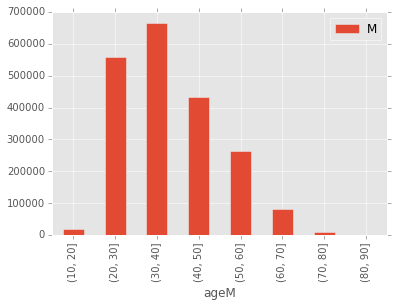

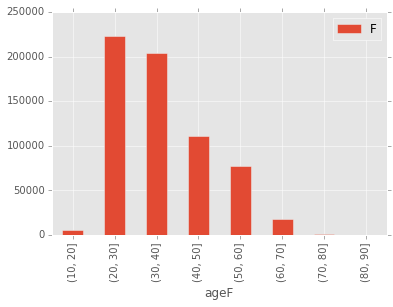

In [11]:
bins = np.arange(10, 99, 10)
ax1 = summer_df.ageM.groupby(pd.cut(summer_df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', label = "Male");
ax1.legend("Male");

ax2 = summer_df.ageF.groupby(pd.cut(summer_df.ageF, bins)).agg([count_nonzero]).plot(kind='bar', label = "Female");
ax2.legend('Female');


In [6]:
#Here I will add the extra credit implementation of KS test

## Correlation tests
**KS Test**

          count_nonzero
ageM                   
(10, 20]       0.000537
(20, 30]       0.073800
(30, 40]       0.063086
(40, 50]       0.021737
(50, 60]       0.013820
(60, 70]       0.001955
(70, 80]       0.000305
(80, 90]       0.000000


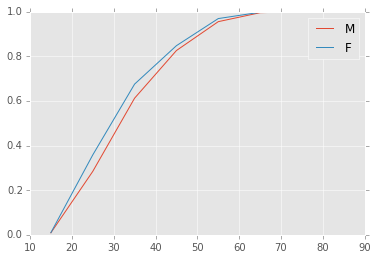

In [16]:
#print df.ageS, df.ageS.cumsum()

csM=summer_df.ageM.groupby(pd.cut(summer_df.ageM, bins)).agg([count_nonzero]).cumsum()
csF=summer_df.ageF.groupby(pd.cut(summer_df.ageF, bins)).agg([count_nonzero]).cumsum()

#The normalized difference between both samples
print np.abs(csM / csM.max()-csF / csF.max()) 

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend();

The choosen significance level fot the K-S test is alpha=0.05
Therefor c(alpha) = 1.36

In [28]:
import scipy.stats as st
from __future__ import division

ks = st.ks_2samp(summer_df.ageM, summer_df.ageF)
ks_statistic, p_value = ks[0], ks[1]

RHS = 1.36*np.sqrt((len(summer_df.ageM)+len(summer_df.ageF)) / (len(summer_df.ageM)*len(summer_df.ageF)))


In [29]:
print "D(n1, n2) = %f" % ks_statistic
print "Critical Value = %f" % RHS

D(n1, n2) = 0.432914
Critical Value = 0.001074


Since the KS statistic is greater than the critical value, the null hypothesis is rejected at level alpha = 0.05

**Pearson's Test for Correlation**

In [30]:
pearson_stat = st.pearsonr(summer_df.ageM, summer_df.ageF)
print pearson_stat

(nan, 1.0)


Since the pearson test returns a value of 1.0, the two samples appear to ne positively correlated

**Spearman's Test for Correlation**

In [32]:
spearman_stat = st.spearmanr(summer_df.ageM, summer_df.ageF)
print spearman_stat

(-0.39285951112051964, 0.0)


TO-DO - They are negatively correlated and reject hypothesis
Also look through explaination of KS again - result appears erroneous

# # Age comparison between day time and night time riders